In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import matplotlib.ticker as ticker

In [2]:
with open("./intermediate_vs_models_100000.json") as f:
    int_res = json.load(f)
with open("./novice_vs_models_100000.json") as f:
    nov_res = json.load(f)

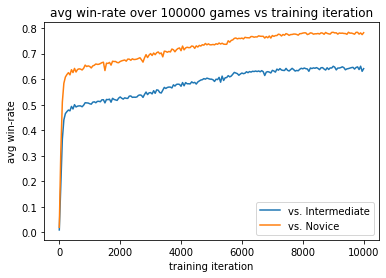

In [3]:
int_wins = [r['player_0_win_mean'] for r in int_res]
nov_wins = [r['player_0_win_mean'] for r in nov_res]
int_it = [r['model_number'] for r in int_res]
nov_it = [r['model_number'] for r in nov_res]

fig, ax = plt.subplots()

plt.ylabel('avg win-rate')
plt.xlabel('training iteration')
plt.title('avg win-rate over 100000 games vs training iteration')
plt.plot(int_it, int_wins, label="vs. Intermediate")
plt.plot(nov_it, nov_wins, label="vs. Novice")
leg = ax.legend()

In [4]:
with open("./intermediate_vs_models_20000_p0_starts.json") as f:
    p0_starts = json.load(f)
with open("./intermediate_vs_models_20000_p1_starts.json") as f:
    p1_starts = json.load(f)

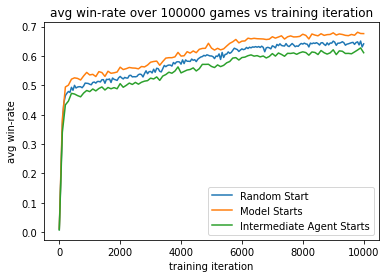

In [5]:
fig, ax = plt.subplots()

p0_wins = [r['player_0_win_mean'] for r in p0_starts]
p1_wins = [r['player_0_win_mean'] for r in p1_starts]
p1_it = [r['model_number'] for r in p1_starts]
plt.ylabel('avg win-rate')
plt.xlabel('training iteration')
plt.title('avg win-rate over 100000 games vs training iteration')
plt.plot(int_it, int_wins, label="Random Start")
plt.plot(p1_it, p0_wins, label="Model Starts")
plt.plot(p1_it, p1_wins, label="Intermediate Agent Starts")
leg = ax.legend()

ipykernel_launcher:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
ipykernel_launcher:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.


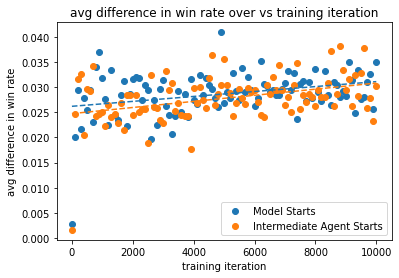

In [15]:
fig, ax = plt.subplots()

p0_wins = np.array([r['player_0_win_mean'] for r in p0_starts]) - np.array(int_wins[::2])
p1_wins = np.array(int_wins[::2]) - np.array([r['player_0_win_mean'] for r in p1_starts])
p1_it = [r['model_number'] for r in p1_starts]
plt.ylabel('avg difference in win rate')
plt.xlabel('training iteration')
plt.title('avg difference in win rate over vs training iteration')
plt.scatter(p1_it, p0_wins, label="Model Starts", s=3)
plt.scatter(p1_it, p1_wins, label="Intermediate Agent Starts", s=3)
leg = ax.legend()

coef = np.polyfit(p1_it, p0_wins, 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(p1_it, poly1d_fn(p1_it), '--k', c='tab:blue')

coef = np.polyfit(p1_it, p1_wins, 1)
poly1d_fn = np.poly1d(coef) 
plt.plot(p1_it, poly1d_fn(p1_it), '--k', c='tab:orange')

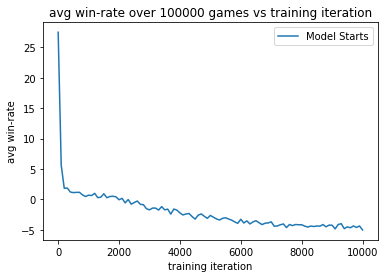

In [10]:
fig, ax = plt.subplots()

p0_score = [(1-r['player_0_win_mean'])*r['player_0_losing_score_mean'] - r['player_0_win_mean']*r['player_1_losing_score_mean'] for r in p0_starts]
p1_wins = [r['player_0_win_mean'] for r in p1_starts]
p1_it = [r['model_number'] for r in p1_starts]
plt.ylabel('avg win-rate')
plt.xlabel('training iteration')
plt.title('avg win-rate over 100000 games vs training iteration')
# plt.plot(int_it, int_wins, label="Random Start")
plt.plot(p1_it, p0_score, label="Model Starts")
# plt.plot(p1_it, p1_wins, label="Intermediate Agent Starts")
leg = ax.legend()